In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Slicing and Parsing
#
##########################################################################################

In [ ]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_CSV_Sugar_Metabolomics_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Place completed work in students/Module_1/Your_Name
#    4) Push to your branch on GitHub to submit
#
##################################################################################################################


# Wrangling Sugar Metabolomics Data


In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline

In [2]:


# General info here:
#   https://data.mendeley.com/datasets/9z7ncwvxnz/1
#
# Data here:
#   https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9z7ncwvxnz-1.zip

# I renamed mine to "sugar_metabolomics.csv" so I could remember what it is
data = '../Data/sugar_metabolomics.csv'


In [3]:
##################################################################################################################
#
# YouDo:
# 
#    1) Read the csv into a dataframe called df
#######################################  BEGIN STUDENT CODE  #####################################################

df = pd.read_csv('sugar_metabolomics.csv')
#######################################   END STUDENT CODE   #####################################################

In [6]:
##################################################################################################################
#
# YouDo:
# 
#    1) Notice that the import is wonky -- examine the data set
#       manually and figure out how to make it import cleanly.
#      
#       Ensure your data frame has the following handled correctly
#         a) the column names (1st row of the csv)
#.        b) The unlabeled first column is read as an index
#         c) The final row is totally weird--don't import it
#
#       (hint: pd.read_csv? lists various import options)
#
#######################################  BEGIN STUDENT CODE  #####################################################

# 1)

df = pd.read_csv('sugar_metabolomics.csv', index_col=0, skipfooter=1, engine='python')

#######################################   END STUDENT CODE   #####################################################
assert df.shape == (92, 132)


In [7]:
##################################################################################################################
#
# YouDo:
# 
#    1) Get rid of any columns that have only NaN values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
#
#######################################  BEGIN STUDENT CODE  #####################################################

df = df.dropna(axis='columns', how='all')

#######################################   END STUDENT CODE   #####################################################

assert df.shape == (92, 125)



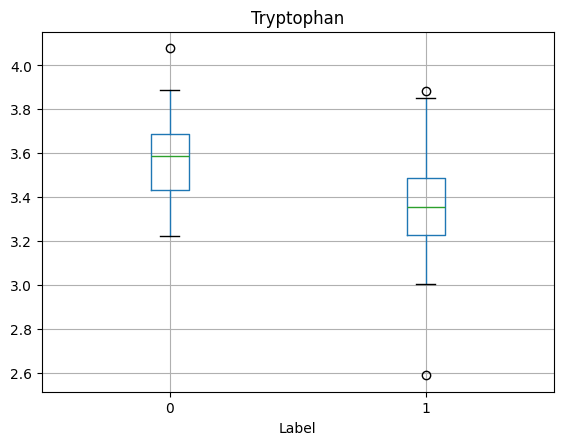

In [8]:
##################################################################################################################
#
# YouDo:
# 
#    1) Generate boxplots of Tryptophan levels separated based on 
#        the "Label" value
#
#      Use whatever plotting library you like.   
#      Hint 1: matplotlib has a boxplot tool
#          help(plt.boxplot)
#      Hint 2: pandas data frames have a built-in boxplot tool
#          help(df.boxplot)
#
#######################################  BEGIN STUDENT CODE  #####################################################

df.boxplot(column = 'Tryptophan', by = 'Label')
plt.suptitle('')
plt.show()

#######################################   END STUDENT CODE   #####################################################


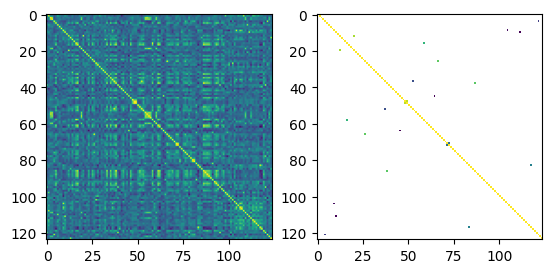

In [10]:
##################################################################################################################
#
# YouDo:
# Make a pair of plots as follows:
#    1) Show the correlation matrix between columns of the data
#        (hint 1: it should be 124x124, hint 2: check out plt.imshow() 
#         Hint 2: numpy has a function for generating the correlation matrix)
#
#    2) Make a similar plot showing correlation > 90%
#
#  Stretch goal:  using plt.subplot()  make a single figure with both plots side-by-side
#
#######################################  BEGIN STUDENT CODE  #####################################################

cor = df.drop('Label', axis = 1)
cor = cor.corr()

cor90 = cor[abs(cor) > 0.9] # Structure from https://datagy.io/python-correlation-matrix/

plt.subplot(1, 2, 1)
plt.imshow(cor)
plt.subplot(1, 2, 2)
plt.imshow(cor90, interpolation= 'none')
plt.show()

#######################################   END STUDENT CODE   #####################################################


In [11]:
##################################################################################################################
#
# YouDo:
#  1) Remove any rows with na values
# 
#  2) Split the data into "test" and "train" bits with ~30% in the test set.
#       The "Label" column is the "y" data.  All other columns are the "X" data
#       Give them these names:
#       X_train, X_test, y_train, y_test

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)

dfdrop = df.dropna(axis = 0)
 
#2)

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(dfdrop.iloc[:, 1:125], dfdrop.iloc[:, 0:1], test_size = 0.3, random_state = 0) 

#######################################   END STUDENT CODE   #####################################################


In [12]:
#Build a model to classify the Label based on the other columns

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8675309)
clf.fit(X_Train, y_train.values.ravel()) # Error solution found: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected


RandomForestClassifier(max_depth=2, random_state=8675309)

In [13]:
# Test the model

predictions = clf.predict(X_Test)
reality = y_test

In [14]:
# YouDo:
#  1) Evaluate the "goodness" of the predictions and write a paragraph describing the results as a markdown.
#
#######################################  BEGIN STUDENT CODE  #####################################################

# From https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(reality, predictions)
precision = precision_score(reality, predictions)
recall = recall_score(reality, predictions)
display(accuracy)
display(precision)
display(recall)

#######################################   END STUDENT CODE   #####################################################


0.875

1.0

0.85

# Analysis
It goes here.

The results of the predictions are an accuracy of 0.875, precision of 1.0, and recall of 0.85. In terms of accuracy, if we were to make predictions on 1000 cases of whether a label is 0 or 1 using this same data and random forest seed, we would presumably get a correct answer for 875 of those cases. As for precision, when the model made a prediction that the label value was "1", there were no cases of false positives, i.e. the label value was actually "0". The recall of this model was 0.85. This means that of the cases that the model made a "0" prediction, 15% of the time the value was actually "1". While I do not know too much about random forest, these metrics appears to be fairly good in terms of the model correctly predicting the Label value. However, the hyperparamters of the forest may be tuned for better results such as increasing the number of trees since this is a fairly small data set and will not be computationally intensive.